# Analiza podatkov sistema BicikeLJ

In [1]:
# Matplotlib inline
%matplotlib inline
# Imports
from urllib.request import urlopen
import json
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from pylab import *
# Figure size and style
plt.rcParams['figure.figsize'] = (15, 10)
#plt.style.use('ggplot')

Branje podatkov po protokolih, opisanih v: https://developer.jcdecaux.com/#/opendata/vls?page=getstarted

Zanimiva je diplomska naloga: http://geo.ff.uni-lj.si/pisnadela/pdfs/zaksem_201409_ziga_jamnik.pdf

In [2]:
# Parameters
# Bicycle, station dynamic infos
station_data_url = "https://api.jcdecaux.com/vls/v1/stations?contract=Ljubljana&apiKey=0a494317d60d3d556d0755600b078ea6b26af90f"
# Station info dataframe
station_info_fn = "bicikelj_station_info.csv"
station_data_fn = "bicikelj_station_data_1701.csv"

# Informacije o postajah

In [3]:
response = urlopen(station_data_url)
if response.code == 200:
    data = response.read().decode('utf-8')
else:
    print("Wrong response from ", station_data_url)

In [4]:
station_info_json = json.loads(data)

In [5]:
station_info = pd.DataFrame(station_info_json).sort_values(["number"]).reset_index(drop=True)

In [6]:
station_info = station_info[station_info['status'] == "OPEN"]

In [7]:
station_info.columns

Index(['address', 'available_bike_stands', 'available_bikes', 'banking',
       'bike_stands', 'bonus', 'contract_name', 'last_update', 'name',
       'number', 'position', 'status'],
      dtype='object')

In [8]:
station_info = station_info[['address', 'banking', 'bike_stands', 'bonus', 'name',
                             'number', 'position', 'status']].copy()

In [9]:
station_info = pd.concat([station_info.drop(['position'], axis=1), station_info["position"].apply(pd.Series)], axis=1)
station_info.head()

,address,banking,bike_stands,bonus,name,number,status,lat,lng
0,Prešernov trg 6,False,20,False,PREŠERNOV TRG-PETKOVŠKOVO NABREŽJE,1,OPEN,46.051367,14.506542
1,Pogačarjev trg 3,False,18,False,POGAČARJEV TRG-TRŽNICA,2,OPEN,46.051093,14.507186
2,Kongresni trg 3,False,20,False,KONGRESNI TRG-ŠUBIČEVA ULICA,3,OPEN,46.050388,14.504623
3,Cankarjeva cesta 1,False,26,False,CANKARJEVA UL.-NAMA,4,OPEN,46.052431,14.503257
4,Breg 20,False,20,False,BREG,5,OPEN,46.046498,14.505148


In [10]:
# Save to CSV
station_info.to_csv(station_info_fn, index=True)

In [11]:
station_info_s = station_info[["bike_stands", "name", "number"]]
station_info_s = station_info_s.set_index("number")

In [12]:
station_info_s

,bike_stands,name
number,,
1,20,PREŠERNOV TRG-PETKOVŠKOVO NABREŽJE
2,18,POGAČARJEV TRG-TRŽNICA
3,20,KONGRESNI TRG-ŠUBIČEVA ULICA
4,26,CANKARJEVA UL.-NAMA
5,20,BREG
6,18,GRUDNOVO NABREŽJE-KARLOVŠKA C.
7,18,MIKLOŠIČEV PARK
8,22,BAVARSKI DVOR
9,26,TRG OF-KOLODVORSKA UL.


# Branje podatkov o postajah

In [13]:
station_data_full = pd.read_csv(station_data_fn, index_col="last_update_time", parse_dates=True)

FileNotFoundError: File b'bicikelj_station_data_1701.csv' does not exist

In [13]:
station_data_full.describe()

,available_bike_stands,available_bikes,bike_stands,number
count,644.000000,644.000000,644.000000,644.000000
mean,11.267081,8.009317,20.072981,16.972050
std,5.330750,5.483177,3.217751,10.768705
min,0.000000,0.000000,8.000000,1.000000
25%,7.000000,4.000000,18.000000,7.750000
50%,11.000000,7.000000,20.000000,16.500000
75%,15.000000,11.000000,20.000000,26.000000
max,26.000000,26.000000,26.000000,38.000000


In [14]:
station_data_full.index.min()

Timestamp('2017-01-25 08:55:33')

In [15]:
station_data_full.index.max()

Timestamp('2017-01-28 17:34:14')

In [16]:
station_data_full.head()

,available_bike_stands,available_bikes,bike_stands,number
last_update_time,,,,
2017-01-25 08:55:33,17,1,18,29
2017-01-25 08:55:54,17,0,18,28
2017-01-25 08:56:13,12,8,20,1
2017-01-25 08:58:19,20,0,20,11
2017-01-25 08:58:26,16,9,26,31


In [17]:
station_data_stands = station_data_full.pivot(columns='number', values='available_bike_stands')
station_data_bikes = station_data_full.pivot(columns='number', values='available_bikes')

In [18]:
station_data_stands_hour = station_data_stands.groupby(station_data_stands.index.hour).aggregate("mean")
station_data_bikes_hour = station_data_bikes.groupby(station_data_bikes.index.hour).aggregate("mean")
station_data_bikes_hour

number,1,2,3,4,5,6,7,8,9,10,...,29,30,31,32,33,34,35,36,37,38
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,...,11.0,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,2.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,4.000000,NaN,1.00,5.000000,NaN,14.0,NaN,...,12.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,6.0,NaN,4.000000,10.666667,NaN,NaN,7.000000,NaN,11.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8.0,NaN,8.250000,17.000000,1.000000,NaN,9.000000,6.25,NaN,0.500000,...,1.0,NaN,9.0,6.0,7.0,NaN,5.50,6.000000,9.0,NaN
9,8.0,8.545455,16.000000,13.400000,2.000000,5.00,4.333333,5.75,1.5,6.000000,...,1.0,9.000000,8.0,NaN,10.0,6.0,4.50,15.000000,NaN,13.000000
10,NaN,NaN,18.500000,17.250000,3.000000,3.00,3.000000,NaN,4.5,5.000000,...,NaN,NaN,7.0,NaN,NaN,7.0,4.00,NaN,10.0,NaN
11,12.0,10.000000,5.000000,20.500000,5.000000,2.00,4.000000,8.00,NaN,7.250000,...,NaN,2.500000,NaN,3.0,11.0,1.0,6.00,10.500000,NaN,10.000000


# Porazdelitev razpoložljivih koles glede na uro

In [19]:
bicikelj_pdf = "bicikelj_available.pdf"
pdf = PdfPages(bicikelj_pdf)
for col in station_data_bikes_hour.columns:
    data = station_data_bikes_hour[col].dropna()
    plt.title(str(col) + " - " + station_info_s["name"][col])
    plt.ylim(0, station_info_s["bike_stands"][col])
    plt.xlim(0,23)
    plt.xticks(range(0,25))
    plt.yticks(range(0,station_info_s["bike_stands"][col]+1))
    plt.grid(True)
    # plt.plot(data)
    plt.plot(data, linestyle="steps")
    pdf.savefig()
    close()
pdf.close()

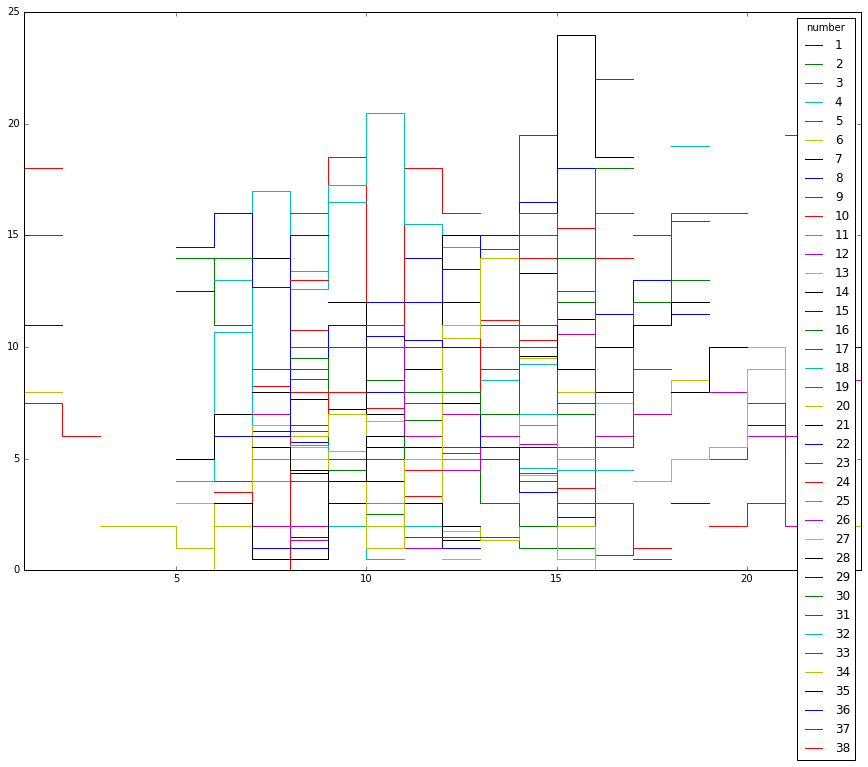

In [20]:
station_data_bikes_hour.plot(linestyle="steps")

# Število koles po urah

Enako kot zgoraj, samo z grupiranjem

In [21]:
station_data_full = pd.read_csv(station_data_fn, index_col="last_update_time", parse_dates=True)
station_data_full.head()

,available_bike_stands,available_bikes,bike_stands,number
last_update_time,,,,
2017-01-25 08:55:33,17,1,18,29
2017-01-25 08:55:54,17,0,18,28
2017-01-25 08:56:13,12,8,20,1
2017-01-25 08:58:19,20,0,20,11
2017-01-25 08:58:26,16,9,26,31


In [22]:
station_group_bikes_hour = station_data_full.groupby(["number", station_data_full.index.hour])["available_bikes"].mean()

In [23]:
# station_group_bikes_hour = station_group_bikes.unstack(level=1)

In [24]:
bicikelj_pdf = "bicikelj_available_2.pdf"
pdf = PdfPages(bicikelj_pdf)
for key in station_group_bikes_hour.index.levels[0]:
    data = station_group_bikes_hour[key]
    plt.title(str(key) + " - " + station_info_s["name"][key])
    plt.ylim(0, station_info_s["bike_stands"][key])
    plt.xlim(0,23)
    plt.xticks(range(0,25))
    plt.yticks(range(0,station_info_s["bike_stands"][key]+1))
    plt.grid(True)
    plt.plot(data, linestyle="steps")
    pdf.savefig()
    close()
pdf.close()

# Izposoje koles

In [25]:
station_data_full = pd.read_csv(station_data_fn, index_col="last_update_time", parse_dates=True)
station_data_full.head()

,available_bike_stands,available_bikes,bike_stands,number
last_update_time,,,,
2017-01-25 08:55:33,17,1,18,29
2017-01-25 08:55:54,17,0,18,28
2017-01-25 08:56:13,12,8,20,1
2017-01-25 08:58:19,20,0,20,11
2017-01-25 08:58:26,16,9,26,31


Urejeno po postajah

In [26]:
station_group_bikes = station_data_full.groupby("number")

In [27]:
type(station_group_bikes.groups)

dict

In [28]:
data = station_group_bikes.get_group(1)
data["change"] = data["available_bikes"].diff()
data.head()

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,available_bike_stands,available_bikes,bike_stands,number,change
last_update_time,,,,,
2017-01-25 08:56:13,12,8,20,1,NaN
2017-01-25 09:29:17,11,9,20,1,1.0
2017-01-25 09:50:22,13,7,20,1,-2.0
2017-01-25 12:23:46,10,10,20,1,3.0
2017-01-25 12:26:43,9,11,20,1,1.0


In [29]:
bicikelj_pdf = "bicikelj_available_3.pdf"
pdf = PdfPages(bicikelj_pdf)
# List groups
for key, item in station_group_bikes:
    data = station_group_bikes.get_group(key).copy()
    data["change"] = data["available_bikes"].diff()
    plt.title(str(key) + " - " + station_info_s["name"][key])
    plt.plot(data[["available_bikes", "change"]], linestyle="steps")
    plt.grid(True)
    pdf.savefig()
    close()
pdf.close()